[View in Colaboratory](https://colab.research.google.com/github/LisbonKaggleMeetup/BikeSharingDemand/blob/master/notebooks/getting_started.ipynb)

# Bike sharing demand prediction challenge

### Import libraries

In [0]:
import pandas as pd
import numpy as np

### Load data

### Training dataset

In [0]:
# Load the training dataset
train = pd.read_csv("data/train.csv")

# Convert the time stamp column to datetime format
train.datetime=pd.to_datetime(train.datetime)

# Use the time stamp as index (this will let you filter by date)
train = train.set_index("datetime")

# Sort the dataset just in case (to avoid unexpected bugs)
train = train.sort_index()

# Rename the count column which conflicts with the method
train = train.rename(columns={'count':'total'})

In [6]:
train.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total
datetime,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [7]:
train.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


### Test

In [0]:
# Repeat for the test set
test = pd.read_csv("data/test.csv")
test.datetime = pd.to_datetime(test.datetime)
test = test.set_index("datetime")
test = test.sort_index()

In [21]:
test.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
datetime,,,,,,,,
2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [22]:
test.tail()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
datetime,,,,,,,,
2012-12-31 19:00:00,1,0,1,2,10.66,12.880,60,11.0014
2012-12-31 20:00:00,1,0,1,2,10.66,12.880,60,11.0014
2012-12-31 21:00:00,1,0,1,1,10.66,12.880,60,11.0014
2012-12-31 22:00:00,1,0,1,1,10.66,13.635,56,8.9981
2012-12-31 23:00:00,1,0,1,1,10.66,13.635,65,8.9981


# Data Preparation
## Missing values

In [23]:
train.isna().sum()

season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
total         0
dtype: int64

At first sight it seems there are no missing values.  
However if we count the number of records available in the first 20 days of January we should get 20*24=480. Instead we have:

In [9]:
train[:'2011-01-20'].count()

season        431
holiday       431
workingday    431
weather       431
temp          431
atemp         431
humidity      431
windspeed     431
casual        431
registered    431
total         431
dtype: int64

For some reason there are ~50 missing records in the first 20 days alone!!

To visualize this we can count the number of records per day with the *resample* method. Note that if no data were missing we'd obtain the value 24 everywhere...

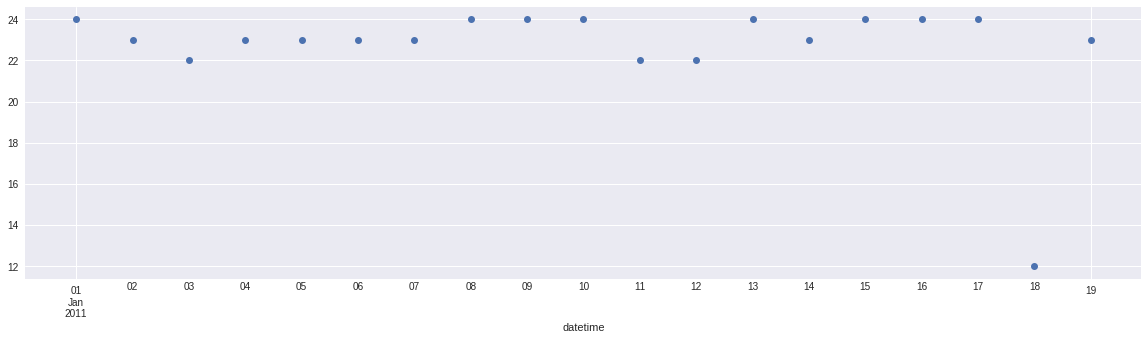

In [10]:
train_copy = train.copy()
train_copy['1']=1
train_copy.resample('D')
train_copy[:'2011-01-20'].resample('D').count()['1'].plot(figsize=(20,5),style='o')

Wow that's lots of days with missing records. According to this on the 18th of January there's only data for half the day, let's confirm:

In [11]:
train["2011-01-18"]

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total
datetime,,,,,,,,,,,
2011-01-18 12:00:00,1,0,1,2,8.20,9.090,86,22.0028,0,3,3
2011-01-18 13:00:00,1,0,1,2,8.20,9.850,86,15.0013,0,22,22
2011-01-18 14:00:00,1,0,1,2,9.02,11.365,80,11.0014,2,26,28
2011-01-18 15:00:00,1,0,1,2,9.02,11.365,87,11.0014,3,32,35
2011-01-18 16:00:00,1,0,1,2,9.02,11.365,87,12.9980,0,61,61
2011-01-18 17:00:00,1,0,1,2,9.02,11.365,82,12.9980,1,124,125
2011-01-18 18:00:00,1,0,1,2,9.02,11.365,80,11.0014,1,132,133
2011-01-18 19:00:00,1,0,1,2,9.02,11.365,80,8.9981,1,98,99
2011-01-18 20:00:00,1,0,1,2,9.02,13.635,87,0.0000,0,83,83


![oh_snap](https://media.giphy.com/media/ljoB50Kfk3ubm/giphy.gif "snap")

### First solution that comes to mind: Imputation

In [45]:
# Create an index with a complete list of values
index_complete = pd.date_range('2011-01-01 00:00:00', 
                               '2012-12-31 23:00:00', 
                               freq='H')

# Use this as index, leaving NaN where values were missing
train = train.reindex(index_complete)
train.tail()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total
2012-12-31 19:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-12-31 20:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-12-31 21:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-12-31 22:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-12-31 23:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [46]:
train.isna().sum()

season        6658
holiday       6658
workingday    6658
weather       6658
temp          6658
atemp         6658
humidity      6658
windspeed     6658
casual        6658
registered    6658
total         6658
dtype: int64

In [0]:
# replace all NaN's with the mean value of the column, aka imputing the mean
train_imputed = train.fillna(train.mean())

In [49]:
train_imputed.isna().sum()

season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
total         0
dtype: int64

# Feature engineering

Add a column with the week day

In [0]:
train_imputed['weekday'] = train_imputed.index.weekday_name

# Data exploration

Let's start by analysing a sample of the data: the total demand during first 3 weeks of March 2011

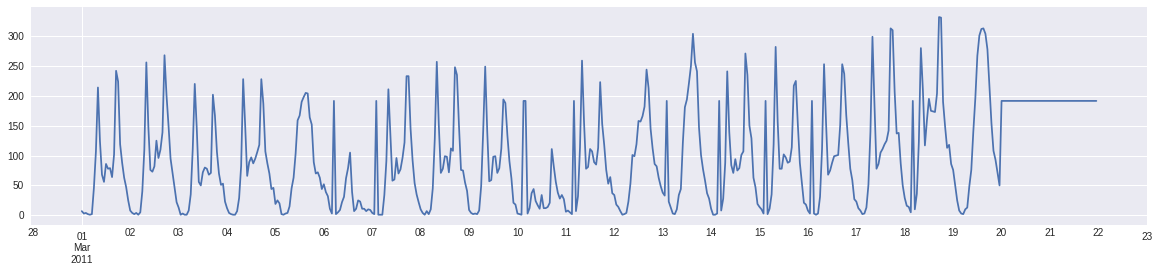

In [56]:
train_imputed["2011-03-01":"2011-03-21"].total.plot(figsize=(20,4))

In [70]:
train_imputed.loc["2011-03-01":"2011-03-21",'weekday'].resample('D').first()

2011-03-01      Tuesday
2011-03-02    Wednesday
2011-03-03     Thursday
2011-03-04       Friday
2011-03-05     Saturday
2011-03-06       Sunday
2011-03-07       Monday
2011-03-08      Tuesday
2011-03-09    Wednesday
2011-03-10     Thursday
2011-03-11       Friday
2011-03-12     Saturday
2011-03-13       Sunday
2011-03-14       Monday
2011-03-15      Tuesday
2011-03-16    Wednesday
2011-03-17     Thursday
2011-03-18       Friday
2011-03-19     Saturday
2011-03-20       Sunday
2011-03-21       Monday
Freq: D, Name: weekday, dtype: object

Different behavior on weekdays and weekends:
* 2 peakS on weekdays: morning and afternoon
* 1 peak on weekends in the middle of the day

Therefore we have weekly seasonality, i.e the behavior (roughly) repeats every week 

# Modelling

## Baseline: Seasonal Naive model
The [Naive](https://en.wikipedia.org/wiki/Forecasting#Na%C3%AFve_approach) is the simplest (non-trivial) model we can think of:
it simply predicts the future will be equal to the past.  
Seasonal Naive looks for the same period of the last season which in our case means the previous week.

In [0]:
train_shifted = train_imputed.shift(periods=14, freq='D')

In [123]:
prediction = train_shifted.loc[test.index,['total']].reset_index().rename(columns={'total':'count'})
prediction.head()

,datetime,count
0,2011-01-20 00:00:00,11.000000
1,2011-01-20 01:00:00,4.000000
2,2011-01-20 02:00:00,2.000000
3,2011-01-20 03:00:00,191.574132
4,2011-01-20 04:00:00,1.000000


In [0]:
prediction.to_csv('baseline.csv',index=False)